In [2]:
import yfinance as yf
data = yf.download('AAPL','2020-09-02','2021-06-14', interval="60m")

[*********************100%***********************]  1 of 1 completed


In [3]:
def MovingAverage(df, window):
    avg = df.Close.rolling(window, min_periods=1).mean()
    return avg

def ExponentialMovingAverage(df, window):
    avg = df.ewm(span=window, adjust=False).mean()
    return avg

In [4]:
MA_50 = MovingAverage(data,50)
MA_200 = MovingAverage(data,200)

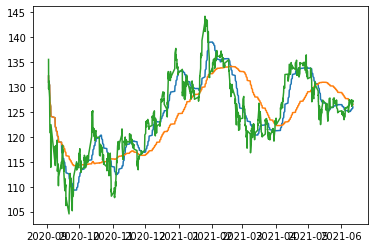

In [6]:
import matplotlib.pyplot as plt

plt.plot(data.index, MA_50)
plt.plot(data.index, MA_200)
plt.plot(data.index, data.Open)
plt.show()

In [11]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


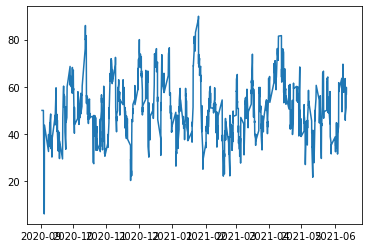

In [16]:
rsi = computeRSI(data.Open, 14)
rsi = rsi.fillna(50)
rsi = rsi.to_numpy()
rsi = np.insert(rsi, 0, 50, axis=0)

plt.plot(data.index, rsi)
plt.plot(data.index, MA_50)
plt.plot(data.index, MA_200)
plt.plot(data.index, data.Open)
plt.show()

In [15]:
rsi.shape

(1358,)

In [9]:
import numpy as np

datetimes = data.index.to_numpy()
prices = data.Open.to_numpy()

returns = 0
log = {}

hold = False
for i, date in enumerate(datetimes):

    if i > 0:
        
        #if previously the 200 day moving average is greater than the 50 day
        if MA_200[i - 1] > MA_50[i - 1]:

            #if a golden cross occurs
            if MA_50[i] >= MA_200[i]:

                log[date] = 'Bought for ' + str(prices[i])

                returns = returns - prices[i]

                print(val)
                print('buy')

        #if previously the 50 day moving average is greater than the 200 day
        if MA_50[i - 1] > MA_200[i - 1]:

            #if a death cross occurs
            if MA_200[i] >= MA_50[i]:

                log[date] = 'Sold for ' + str(prices[i])

                returns = returns + prices[i]

                print(val)
                print('sell')

cumreturns = profit - 

2021-06-11 15:30:00-04:00
buy
2021-06-11 15:30:00-04:00
sell
2021-06-11 15:30:00-04:00
buy
2021-06-11 15:30:00-04:00
sell
2021-06-11 15:30:00-04:00
buy
2021-06-11 15:30:00-04:00
sell


In [10]:
returns

12.490005493164062